In [2]:
# Librerie per manipolazione dati
import pandas as pd           # Analisi e manipolazione dati strutturati
import numpy as np           # Calcoli numerici e operazioni matematiche

# Librerie per visualizzazione
import matplotlib.pyplot as plt  # Creazione di grafici base
import seaborn as sns           # Visualizzazioni statistiche avanzate

# Librerie per Machine Learning
from sklearn.model_selection import train_test_split  # Divisione dataset train/test
from sklearn.compose import ColumnTransformer         # Preprocessing colonne diverse
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding e scaling
from sklearn.pipeline import Pipeline                 # Creazione pipeline ML
from sklearn.linear_model import LinearRegression     # Modello di regressione lineare
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metriche
from sklearn.datasets import load_iris

In [7]:
dataset = load_iris()

dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
print(dataset.feature_names)
dataframe


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Score del modello: 0.8181245472591437


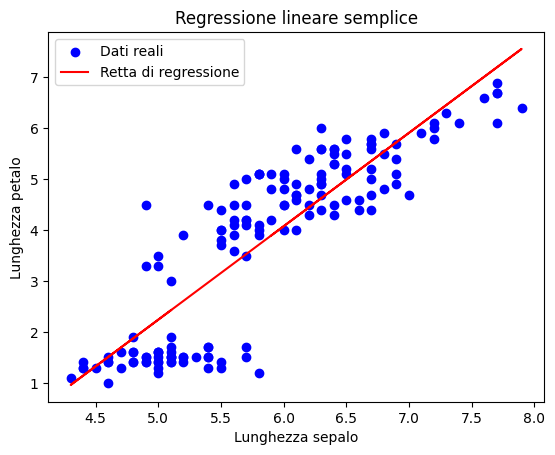

Coefficiente (pendenza): 1.8339625990203465
Intercetta: -6.927127731475695
R^2: 0.8181245472591437
Errore quadratico medio: 0.5960765879745186


In [15]:
l_petalo = dataframe['petal length (cm)'].values
l_sepalo = dataframe['sepal length (cm)'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(
    l_sepalo,
    l_petalo,
    test_size=0.2,
    random_state=42
)

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_predetta = model1.predict(x_test)

print("Score del modello:", model1.score(x_test, y_test))

plt.scatter(l_sepalo, l_petalo, color='blue', label='Dati reali')
plt.plot(l_sepalo, model1.predict(l_sepalo), color='red', label='Retta di regressione')
plt.xlabel("Lunghezza sepalo")
plt.ylabel("Lunghezza petalo")
plt.legend()
plt.title("Regressione lineare semplice")
plt.show()


print("Coefficiente (pendenza):", model1.coef_[0])
print("Intercetta:", model1.intercept_)
print("R^2:", r2_score(y_test, y_predetta))
print("Errore quadratico medio:", mean_squared_error(y_test, y_predetta))

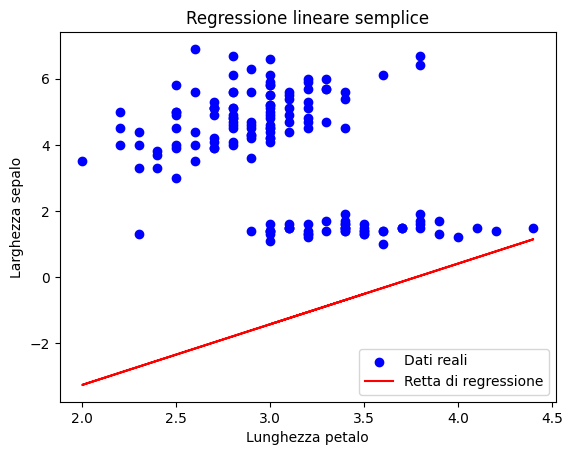

Coefficiente (pendenza): -1.6858813236866592
Intercetta: 8.888273319353988
R^2: 0.16541926931751016
Errore quadratico medio: 2.735245613619562


In [17]:
larghezza_sepalo = dataframe['sepal width (cm)'].values.reshape(-1,1)

x_tn, x_ts, y_tn, y_ts = train_test_split(
    larghezza_sepalo, 
    l_petalo,
    test_size=0.2,
    random_state=42
)

model2 = LinearRegression()
model2.fit(x_tn, y_tn)

y_pred = model2.predict(x_ts)

plt.scatter(larghezza_sepalo, l_petalo, color='blue', label='Dati reali')
plt.plot(larghezza_sepalo, model1.predict(larghezza_sepalo), color='red', label='Retta di regressione')
plt.xlabel("Lunghezza petalo")
plt.ylabel("Larghezza sepalo")
plt.legend()
plt.title("Regressione lineare semplice")
plt.show()

print("Coefficiente (pendenza):", model2.coef_[0])
print("Intercetta:", model2.intercept_)
print("R^2:", r2_score(y_ts, y_pred))
print("Errore quadratico medio:", mean_squared_error(y_ts, y_pred))

In [19]:
x = dataframe[['sepal length (cm)', 'sepal width (cm)' ]]
y = dataframe['petal length (cm)']

xtn, xts, ytn, yts = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

model3 = LinearRegression()
model3.fit(xtn, ytn)

yprd = model3.predict(xts)

print("R^2:", r2_score(yts, yprd))
print("MSE:", mean_squared_error(yts, yprd))
print("Coefficiente angolare:", model3.coef_)
print("Intercetta:", model3.intercept_)



R^2: 0.8924486678535343
MSE: 0.35248754096202517
Coefficiente angolare: [ 1.75575952 -1.34152463]
Intercetta: -2.365531737511893
